In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV as gridsearchcv
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, auc, roc_curve

from sklearn.neural_network import MLPClassifier as mlp
from sklearn.tree import DecisionTreeClassifier as dtc

from scipy import stats

import math
import os
import random

In [2]:
## Move to correct folder for server.  Can remove before sending
# os.chdir('/home/poblivsig/Dropbox/horses2')
os.chdir('/home/poblivsig/Dropbox/horses2')
print(os.getcwd())

/home/poblivsig/Dropbox/horses2


In [3]:
## Open the pre-processed csv
df = pd.read_csv('data/winequality-red.csv')

In [4]:
## Get info about wine
print(f'Shape\n\n{df.shape}')
print(f'Columns\n\n{df.columns}')
print(f'dtypes\n\n{df.dtypes}')
pd.set_option('display.max_columns', None)
print(f'Description\n\n{df.describe()}')
print(f'Info:\n{df.info}')
print(f'Check out the sample: {df.sample(n=1)}')
pd.set_option('display.max_columns', 5)

Shape

(1599, 12)
Columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
Description

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0

/Users/paullivesey/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


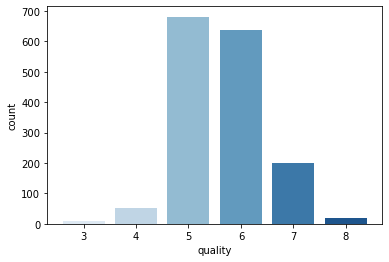

In [6]:
# Count the different quality values
sns.countplot(df['quality'],
              palette='Blues',
              label="Quality Count", )
plt.plot()
plt.savefig('data/charts/bc_diag_countplot.png')

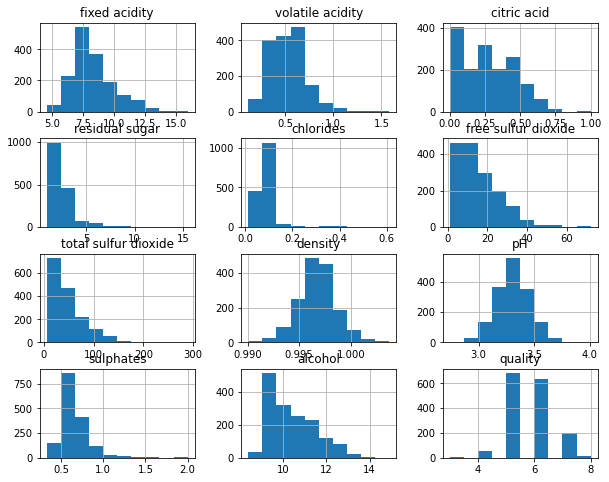

In [11]:
# Create mini-histograms for each attribute
df.hist(bins=10,
        figsize=(10, 8))
plt.show()

# Build density plots
# df.plot(kind='density',
#         subplots=True,
#         sharex=False,
#         layout=(3,4))
# plt.show()

In [9]:
# Try a scatterplot matrix from https://medium.com/analytics-vidhya/step-by-step-guide-for-predicting-wine-quality-using-scikit-learn-de5869f8f91a

[]

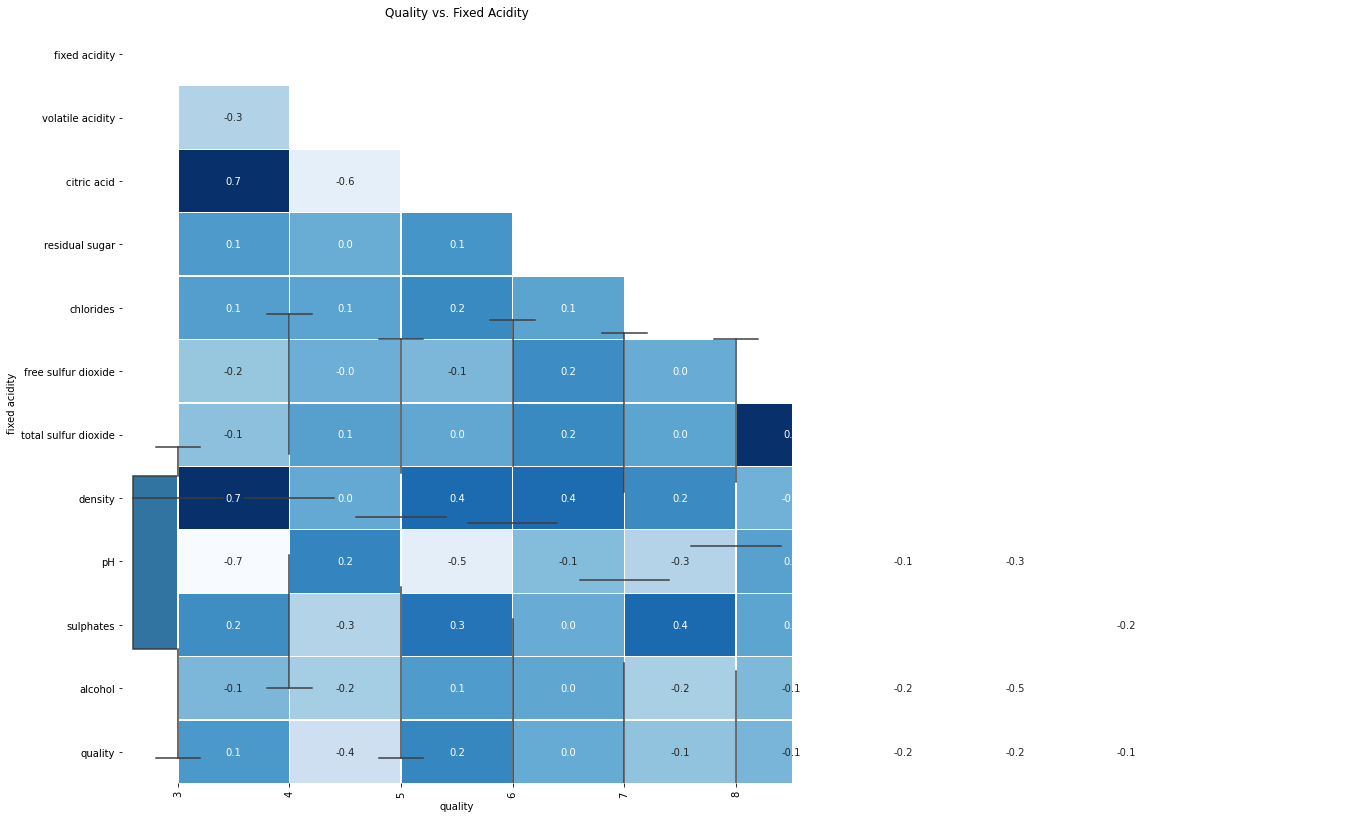

In [10]:
# Build a heatmap to find the attributes that correlate the most
# f,ax = plt.subplots(figsize=(12, 14))
# conf_matrix = np.triu(correlations)
# sns.heatmap(df.corr(),
#             annot=True,
#             cbar=0,
#             linewidths=.3,
#             fmt='.1f',
#             cmap='Blues',
#             ax=ax,
#             mask=conf_matrix)
# plt.plot()

In [12]:
# Find the amount of correlation between each column and the quality
corrs = df.corr()
corr_quality = corrs['quality']
print('Amount of correlation (Pearsons r) for each column:')
print(corr_quality.sort_values(ascending=False))

Amount of correlation (Pearsons r) for each column:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


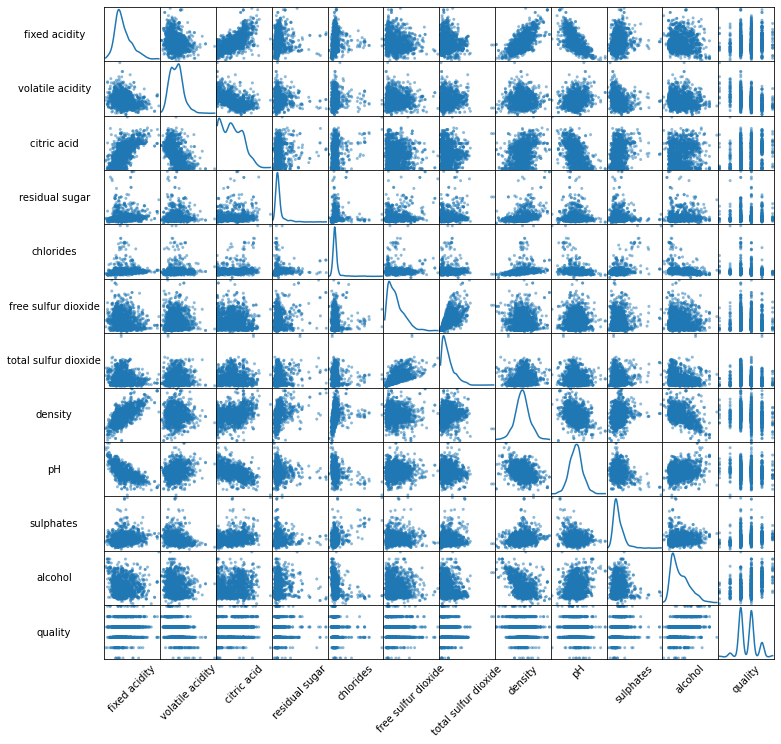

In [111]:
# Create a scatterplot matrix with a Kernel Density estimation on the diagonal
scatter_matrix = pd.plotting.scatter_matrix(df, diagonal='kde', cmap='Blues', figsize=(12, 12))

#May need to offset label when rotating to prevent overlap of figure
[scat.get_yaxis().set_label_coords(-0.9, 0.4) for scat in scatter_matrix.reshape(-1)]

# Rotate all of the column names
[scat.xaxis.label.set_rotation(45) for scat in scatter_matrix.reshape(-1)]
[scat.yaxis.label.set_rotation(0) for scat in scatter_matrix.reshape(-1)]

# Remove all of the markings and numbers along the axes
[scat.set_xticks(()) for scat in scatter_matrix.reshape(-1)]
[scat.set_yticks(()) for scat in scatter_matrix.reshape(-1)]

plt.show()

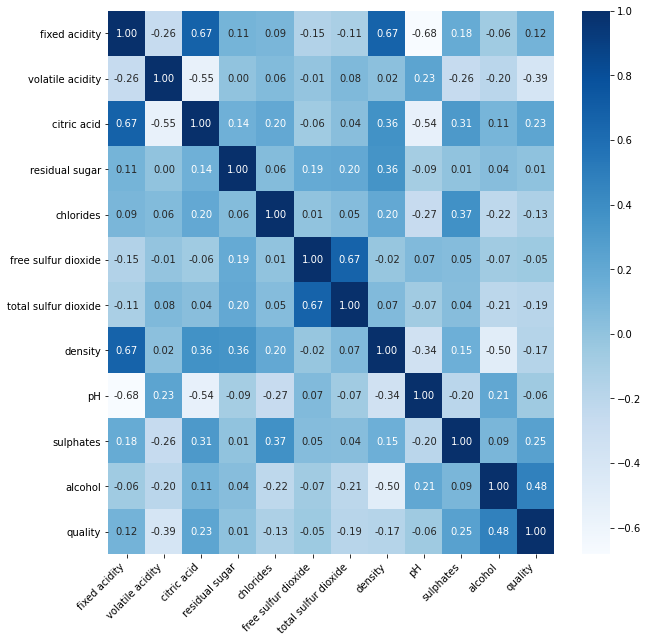

In [86]:
col_names = ['fixed acidity',
             'volatile acidity',
             'citric acid',
             'residual sugar',
             'chlorides',
             'free sulfur dioxide',
             'total sulfur dioxide',
             'density',
             'pH',
             'sulphates',
             'alcohol',
             'quality']
fig, ax = plt.subplots(figsize=(10, 10))

# Create color map
colormap = sns.diverging_palette(220,
                                 10,
                                 as_cmap=True)

# Create Heat Map, including annotations
# Put the floating point numbers in the map
sns.heatmap(corrs,
            cmap='Blues',
            fmt=".2f",
            annot=True)

ax.set_xticklabels(
    col_names,
    horizontalalignment='right',
    rotation=45)

ax.set_yticklabels(col_names)
plt.show()

In [92]:
# for (col_name, _) in df.iteritems():
#     print(f"{col_name}: {df[col_name].corr(df['quality'], method='pearson'):.2f}")

Amount of correlation (Pearsons r) for each column:
fixed acidity: 0.12
volatile acidity: -0.39
citric acid: 0.23
residual sugar: 0.01
chlorides: -0.13
free sulfur dioxide: -0.05
total sulfur dioxide: -0.19
density: -0.17
pH: -0.06
sulphates: 0.25
alcohol: 0.48
quality: 1.00


[]

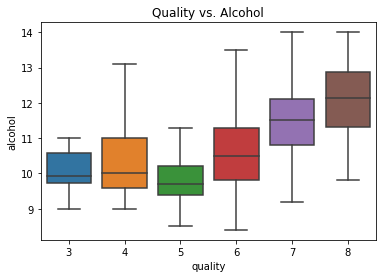

In [94]:
###############################
# Build boxplots for the most correlated against the different quality levels (3)

## Alcohol
plot = sns.boxplot(x='quality',
                   y='alcohol',
                   data=df,
                   showfliers=False)
plot.set_title('Quality vs. Alcohol')
plt.plot()

[]

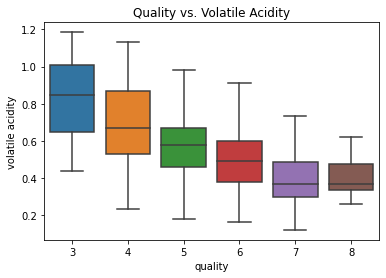

In [95]:
## Volatile acidity
plot = sns.boxplot(x='quality',
                   y='volatile acidity',
                   data=df,
                   showfliers=False)
plot.set_title('Quality vs. Volatile Acidity')
plt.plot()

In [ ]:
## Sulphates
plot = sns.boxplot(x='quality',
                   y='sulphates',
                   data=df,
                   showfliers=False)
plot.set_title('Quality vs. Sulphates')
plt.plot()

[]

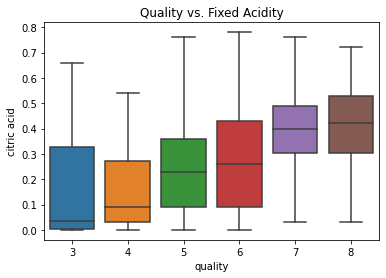

In [97]:
## Citric Acid
plot = sns.boxplot(x='quality',
                   y='citric acid',
                   data=df,
                   showfliers=False)
plot.set_title('Quality vs. Fixed Acidity')
plt.plot()

[]

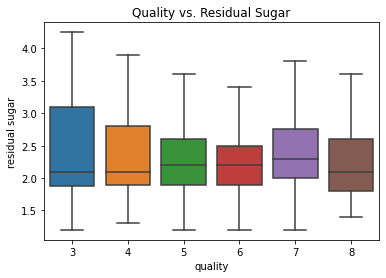

In [98]:
## Residual Sugar
plot = sns.boxplot(x='quality',
                   y='residual sugar',
                   data=df,
                   showfliers=False)
plot.set_title('Quality vs. Residual Sugar')
plt.plot()

In [5]:
## Split the data up.
y = df['quality']
X = df.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    stratify=y,
                                                    random_state=14)
print(df.shape)

(1599, 12)


In [6]:
# Scale the features (attributes)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [39]:
# Logistical Regression
lr = LogisticRegression(random_state = 0, max_iter=200)
lr.fit(x_train, y_train)

print(f'logistic regression training accuracy: {lr.score(x_train, y_train)}')

Logistic Regression training accuracy: 0.6110531803962461


In [18]:
# using decisiontreeclassifier
tree = dtc(criterion = 'gini', random_state = 0)
tree.fit(x_train, y_train)
print('[3]decision tree classifier training accuracy:', tree.score(x_train, y_train))

[3]Decision Tree Classifier Training Accuracy: 1.0


In [19]:
tree_predictions = tree.predict(x_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)
print(f'tree accuracy = {tree_accuracy}')

Tree Accuracy = 0.5828125


In [7]:
# print(cross_val_score(decisiontreeclassifier(criterion = 'gini', random_state = 0), x_train, y_train, cv=5))
def gridsearch(estimator, param_grid, cv):
    # criterion = ['gini', 'entropy']
    # hah = dict(criterion=criterion)
    clf = gridsearchcv(estimator=estimator,
                       param_grid=param_grid,
                       n_jobs=-1,
                       cv=cv,
                       return_train_score=True,
                       scoring=make_scorer(mean_squared_error))

    clf.fit(X_train, y_train)

    ### Output the results

    print(f'Best parameters: {clf.best_params_}')
    print(f'Best score: {clf.best_score_}')
    best_estimate = clf.best_estimator_
    print(best_estimate)

    ## Now we have found the best parameters, use them...
    best_estimate.fit(X_train,y_train)

    predictor = best_estimate.predict(X_train)
    mse = mean_squared_error(predictor, y_train)
    r2 = r2_score(predictor, y_train)
    print(f'Training Mean Square Error: {mse:.2f}')
    print(f'Training R2: {r2:.2f}')

    y_predictor = best_estimate.predict(X_test)
    mse = mean_squared_error(y_test, y_predictor)
    r2 = r2_score(y_test, y_predictor)
    print(f'Testing Mean Square Error: {mse:.2f}')
    print(f'Testing R2: {r2:.2f}')
    print('blah')

    return best_estimate, y_predictor


In [8]:
def cm_and_class_rep(X_test, y_test, y_predictor, best_estimate):
    confusion_matrix(y_test, y_predictor)
    plot_confusion_matrix(best_estimate,
                          X_test,
                          y_test,
                          cmap=plt.cm.Blues,
                          normalize='true' )

    print(classification_report(y_test, y_predictor))



In [40]:

from sklearn import tree as tr
# Output diagram of the decision tree.
fig = plt.figure(figsize=(300, 240))
_ = tr.plot_tree(dtc_best_estimate,
                   filled=True)
fig.savefig("decision_tree.png")

In [9]:
def draw_learning_curve(estimator, X_train, y_train, cv, train_max):

    # Do the curbe
    sizes, \
    training_scores, \
    testing_scores, \
    fit_times, \
    score_times = learning_curve(estimator,
                                 X_train,
                                 y_train,
                                 cv=cv,
                                 scoring='recall',
                                 return_times=True,
                                 train_sizes=np.arange(1, train_max, 10))

    # Standard Deviation and Mean of training scores
    Standard_Deviation_training = np.std(training_scores, axis=1)
    mean_training = np.mean(training_scores, axis=1)
    print(f'mean_training = {mean_training}')
    print(f'\nTraining SD = {Standard_Deviation_training}')

    # Standard Deviation and Mean of testing scores
    Standard_Deviation_testing = np.std(testing_scores, axis=1)
    mean_testing = np.mean(testing_scores, axis=1)
    print(f'mean_testing = {mean_testing}')
    print(f'\nTesting SD = {Standard_Deviation_testing}')

    # Do the plot
    plt.plot(sizes, mean_training, '--', label='Training Score', color='r')
    plt.plot(sizes, mean_testing, color='b', label='Cross Validation Score')
    plt.title('Decision Tree Learning Curve')
    plt.xlabel('Training Set Size'), plt.ylabel('Accuracy'), plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig('data/dt_learning_curve.png')
    plt.show()

/home/poblivsig/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"


Best parameters: {'criterion': 'entropy', 'max_depth': 36}
Best score: 0.708832219938335
DecisionTreeClassifier(criterion='entropy', max_depth=36)
Training Mean Square Error: 0.00
Training R2: 1.00
Testing Mean Square Error: 0.67
Testing R2: -0.04
blah
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.29      0.12      0.17        16
           5       0.62      0.65      0.63       204
           6       0.54      0.54      0.54       192
           7       0.48      0.48      0.48        60
           8       0.20      0.20      0.20         5

    accuracy                           0.56       480
   macro avg       0.35      0.33      0.34       480
weighted avg       0.55      0.56      0.55       480



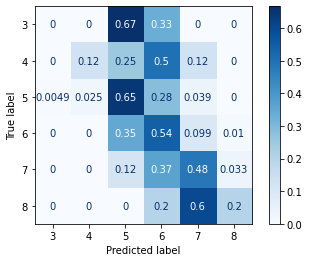

In [10]:
# Do Decision Tree stuff...

# Do a grid search for the Decision Tree
criterion = ['gini', 'entropy']
max_depth = [count for count in range(1, 60)]

param_grid = dict(criterion=criterion,
                  max_depth=max_depth)

best_estimate, y_predictor = gridsearch(estimator=dtc(), param_grid=param_grid, cv=8)

cm_and_class_rep(X_test, y_test, y_predictor, best_estimate)

In [ ]:
#Decision Tree learning curve

draw_learning_curve(dtc(criterion='entropy',
                        max_depth=2),
                        X_train,
                        y_train,
                        cv=8,
                        train_max=900)


In [143]:

# Using the Multi-Layer Perceptron
# Finds RND_COUNT_NUM random number of 1 layers count, RND_COUNT_NUM of 2, all the way to MAX_LAYERS
# MAX_LAYERSMAX_LAYERS = 5
# RND_COUNT_NUM = 100
#
# max_accuracy = 0
# best_layers = ()
# past_layers = []
#
# print('hey')
# for count in range(RND_COUNT_NUM):
#     layers = ()
#     for param_count in range (1, 5):
#         layers = tuple(random.randint(1, MAX_LAYER_SIZE) for _ in range(param_count))
#
#         if layers not in past_layers:
#             print(layers)
#             past_layers.append(layers)
#
#             if mlp_accuracy > max_accuracy:
#                 max_accuracy = mlp_accuracy
#                 best_layers = layers
mlp = MLPClassifier(max_iter=999, hidden_layer_sizes=layers)
mlp.fit(X_train, y_train)

## MLP matrix and classification report
mlp_predictions = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)

print(f'max_accuracy = {max_accuracy}')
print(f'best_layers = {best_layers}')

mlp_cm = confusion_matrix(y_test, mlp_predictions)

# TN = cm[0][0]
# TP = cm[1][1]
# FN = cm[1][0]
# FP = cm[0][1]

# print(cm)
# print('Model[{}] Testing Accuracy = "{}"'.format(tree, (TP + TN) / (TP + TN + FN + FP)))
# print()# Print a new line
# plot_confusion_matrix(mlp,
#                       X_test,
#                       y_test,
#                       cmap=plt.cm.Blues,
#                       normalize='true' )
#
# print(classification_report(y_test, mlp_predictions))

ValueError: multiclass format is not supported

/home/poblivsig/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"
/home/poblivsig/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/poblivsig/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/poblivsig/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Best parameters: {'alpha': 1e-05, 'hidden_layer_sizes': array([ 5,  6,  7,  8,  9, 10, 11, 12]), 'max_iter': 500}
Best score: 0.5755202980472764
MLPClassifier(alpha=1e-05,
              hidden_layer_sizes=array([ 5,  6,  7,  8,  9, 10, 11, 12]),
              max_iter=500)
Training Mean Square Error: 0.43
Training R2: 0.00
Testing Mean Square Error: 0.54
Testing R2: 0.17
blah
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.60      0.69      0.64       204
           6       0.50      0.52      0.51       192
           7       0.55      0.37      0.44        60
           8       0.00      0.00      0.00         5

    accuracy                           0.55       480
   macro avg       0.27      0.26      0.26       480
weighted avg       0.52      0.55      0.53       480



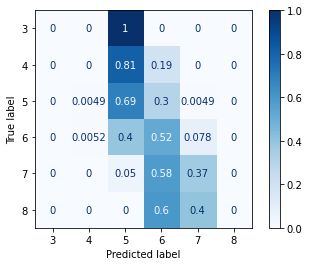

In [11]:
# Do MLP stuff...
MAX_LAYER_SIZE = 30
hidden_layer_sizes = [layers for layers in range(1, MAX_LAYER_SIZE)]
hidden_layer_sizes = np.arange(5,13)
max_iter = [500, 1000, 1500, 2000, 2500]
alpha = 10.0 ** -np.arange(1,7)
param_grid = dict(hidden_layer_sizes=[hidden_layer_sizes],
                  max_iter=max_iter,
                  alpha=alpha)

best_estimate, y_predictor = gridsearch(estimator=mlp(), param_grid=param_grid, cv=8)

cm_and_class_rep(X_test, y_test, y_predictor, best_estimate)

In [29]:
# MLP learning curve

draw_learning_curve(mlp(alpha=1e-06,
                        hidden_layer_sizes=[5],
                        max_iter=200),
                        X_train,
                        y_train,
                        cv=2,
                        train_max=400)

# Best parameters: {'alpha': 1e-06, 'hidden_layer_sizes': array([ 5,  6,  7,  8,  9, 10, 11, 12]), 'max_iter': 1500}
# Best score: 0.5808389003083247
# MLPClassifier(alpha=1e-06,
#               hidden_layer_sizes=array([ 5,  6,  7,  8,  9, 10, 11, 12]),
#               max_iter=1500)

/home/poblivsig/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [144]:

best_estimate, y_predictor = gridsearch(estimator=mlp(), param_grid=param_grid, cv=8)

/home/poblivsig/Dropbox/horses2/venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"


Best parameters: {'alpha': 0.0001, 'hidden_layer_sizes': array([ 5,  6,  7,  8,  9, 10, 11, 12]), 'max_iter': 1500}
Best score: 0.58707605344296
MLPClassifier(hidden_layer_sizes=array([ 5,  6,  7,  8,  9, 10, 11, 12]),
              max_iter=1500)
Training Mean Square Error: 0.00
Training R2: 1.00
Testing Mean Square Error: 0.66
Testing R2: -0.03
blah



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.33      0.12      0.18        16
           5       0.60      0.65      0.63       204
           6       0.55      0.54      0.54       192
           7       0.48      0.48      0.48        60
           8       0.17      0.20      0.18         5

    accuracy                           0.56       480
   macro avg       0.36      0.33      0.34       480
weighted avg       0.55      0.56      0.55       480



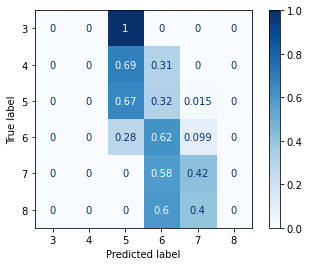

In [34]:
# Do KNN stuff
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

hidden_layer_sizes = [layers for layers in range(1, MAX_LAYER_SIZE)]
hidden_layer_sizes = np.arange(5,13)
max_iter = [500, 1000, 1500, 2000, 2500]
alpha = 10.0 ** -np.arange(1,7)
param_grid = dict(hidden_layer_sizes=[hidden_layer_sizes],
                  max_iter=max_iter,
                  alpha=alpha)
best_estimate, y_predictor = gridsearch(estimator=mlp(), param_grid=param_grid, cv=8)

cm_and_class_rep(X_test, y_test, y_predictor, best_estimate)












/Users/paullivesey/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"
/Users/paullivesey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/paullivesey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/paullivesey/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings

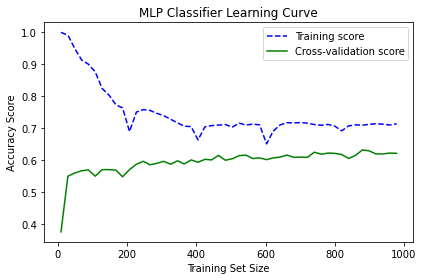

In [35]:
# Learning curve for the neural network
sizes, training_scores, testing_scores = learning_curve(mlp(),
                                                        X_train,
                                                        y_train,
                                                        cv=8,
                                                        scoring='accuracy',
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

# Drawing plot
plt.title("MLP Classifier Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.savefig('dt_learning_curve.png')
plt.show()

#

In [31]:
# Use the following two to get all relevnant values:
# https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5
# https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

# For 3
# True +ve - They said it was the class and it was
print(type(cm))
TP = cm[0][0]
TN = cm[1:, 1:]
FP = cm[0][1:]
TN = cm[1:][0]
TP_sum = np.sum(cm[0][0])
TN_sum = np.sum(cm[1:][1:])
FP_sum = np.sum(cm[0][1:])
TN_sum = np.sum(cm[1:][0])
print(f'TP = \n{TP}')
print(f'TN = \n{TN}')
print(f'FP = \n{FP}')
print(f'FN = \n{FN}')

<class 'numpy.ndarray'>
TP = 
0
TN = 
[ 0  0 12  9  0  0]
FP = 
[0 4 0 0 0]
FN = 
0


In [ ]:
print(max_accuracy)